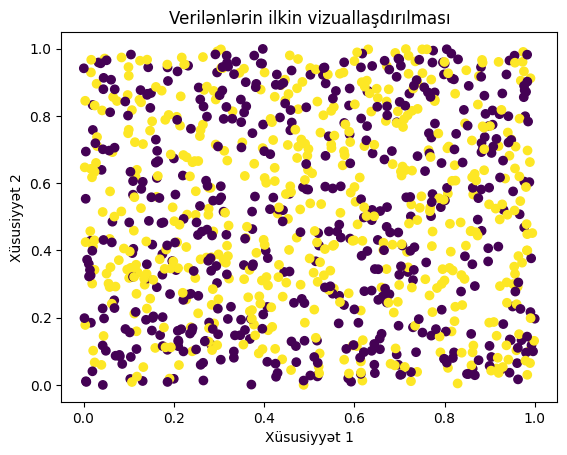

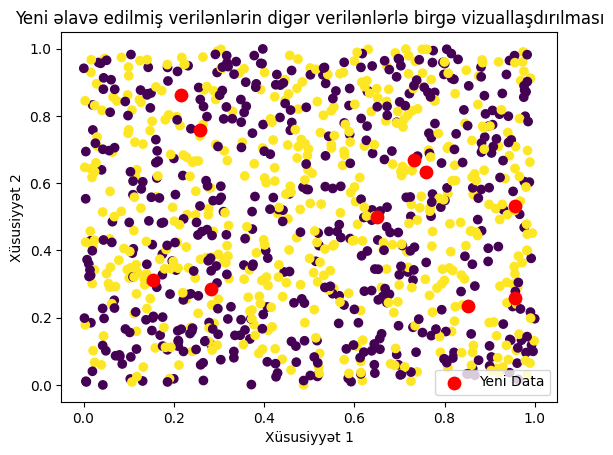

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


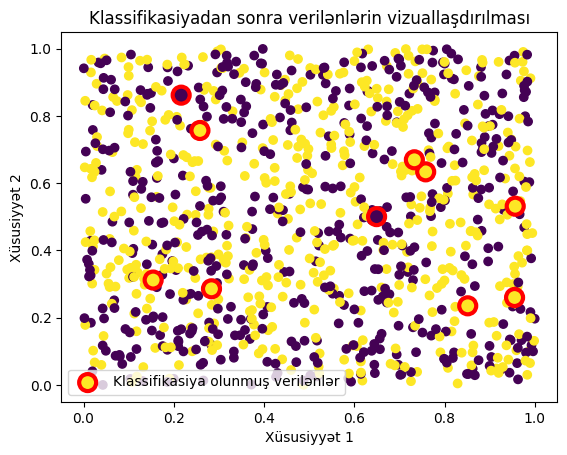

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Addım 1. Təsadüfi yolla verilənlərin yaradılması
np.random.seed(0)
X = np.random.rand(1000, 2)  # Xüsusiyyət matrisi
y = np.random.randint(0, 2, 1000)  # Klassifikasiya vektoru

# Addım 2: Yaradılmış verilənlərin .csv uzantılı faylda saxlanılması
df = pd.DataFrame(X, columns=['Xüsusiyyət_1', 'Xüsusiyyət_2'])
df['Klassifikasiya'] = y
df.to_csv('data.csv', index=False)

# Addım 3: .csv uzantılı fayldan verilənlərin götürülməsi
data = pd.read_csv('data.csv')

# Addım 4: Verilənlərin vizuallaşdırılması
plt.scatter(data['Xüsusiyyət_1'], data['Xüsusiyyət_2'], c=data['Klassifikasiya'])
plt.xlabel('Xüsusiyyət 1')
plt.ylabel('Xüsusiyyət 2')
plt.title('Verilənlərin ilkin vizuallaşdırılması')
plt.show()

# Addım 5: Verilənlərin xüsusiyyət matrisi və klassifikasiya vektorlarına ayrılması
X = data[['Xüsusiyyət_1', 'Xüsusiyyət_2']]
y = data['Klassifikasiya']

# Addım 6: K-ən yaxın qonşu alqoritminin metod vasitəsi ilə tətbiqi
k = 5  # Cari verilənə ən yaxın qonşu olan verilənlərin sayı
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Addım 7: Yeni verilənlərin əlavə olunması
# Fərz edirik ki, əlavə olunmuş verilən iki ölçülüdür.
yeni_data = np.random.rand(10, 2)  # Təsadüfi yolla seçilmiş verilənlər
data = pd.concat([data, pd.DataFrame(yeni_data, columns=['Xüsusiyyət_1', 'Xüsusiyyət_2'])], ignore_index=True)

# Addım 8: Yeni əlavə edilmiş verilənlərin digər verilənlərlə birgə vizuallaşdırılması
plt.scatter(data['Xüsusiyyət_1'], data['Xüsusiyyət_2'], c=data['Klassifikasiya'])
plt.scatter(yeni_data[:, 0], yeni_data[:, 1], s=80, c='red', label='Yeni Data')
plt.xlabel('Xüsusiyyət 1')
plt.ylabel('Xüsusiyyət 2')
plt.title('Yeni əlavə edilmiş verilənlərin digər verilənlərlə birgə vizuallaşdırılması')
plt.legend()
plt.show()

# Addım 9: Yeni əlavə edilmiş verilənlərin klassifikasiyası
proqnoz_olunmus_klassifikasiya = knn.predict(yeni_data)

# Addım 10: Klassifikasiyadan sonra verilənlərin vizuallaşdırılması
plt.scatter(data['Xüsusiyyət_1'], data['Xüsusiyyət_2'], c=data['Klassifikasiya'])
plt.scatter(yeni_data[:, 0], yeni_data[:, 1], c=proqnoz_olunmus_klassifikasiya, s=150, edgecolors='red', linewidth=3, marker="o", label='Klassifikasiya olunmuş verilənlər')
plt.xlabel('Xüsusiyyət 1')
plt.ylabel('Xüsusiyyət 2')
plt.title('Klassifikasiyadan sonra verilənlərin vizuallaşdırılması')
plt.legend()
plt.show()